In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import os
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

In [4]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img



In [5]:
def get_image_paths():
    folder = '/home/zt/Documents/Image Classification Data/Shop_outdoor'
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

In [6]:
X_img_paths = get_image_paths()
print(X_img_paths)

['/home/zt/Documents/Image Classification Data/AUGMENTED', '/home/zt/Documents/Image Classification Data/Customer Area', '/home/zt/Documents/Image Classification Data/Gas_Station', '/home/zt/Documents/Image Classification Data/Inventory', '/home/zt/Documents/Image Classification Data/Office_Space', '/home/zt/Documents/Image Classification Data/POS', '/home/zt/Documents/Image Classification Data/Road_Signage', '/home/zt/Documents/Image Classification Data/Shop_outdoor']


/home/zt/Documents/Image Classification Data/Shop_outdoor/30594751.jpg


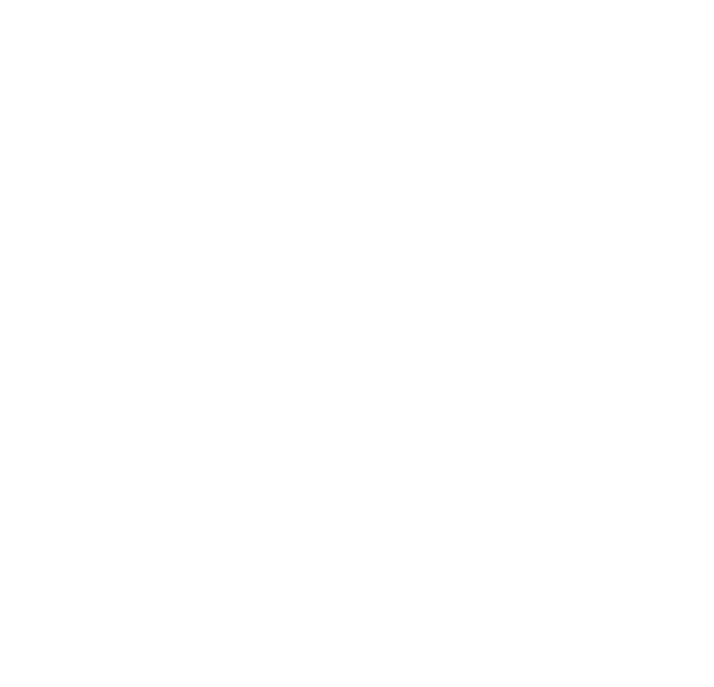

/home/zt/Documents/Image Classification Data/Shop_outdoor/30735157.jpg


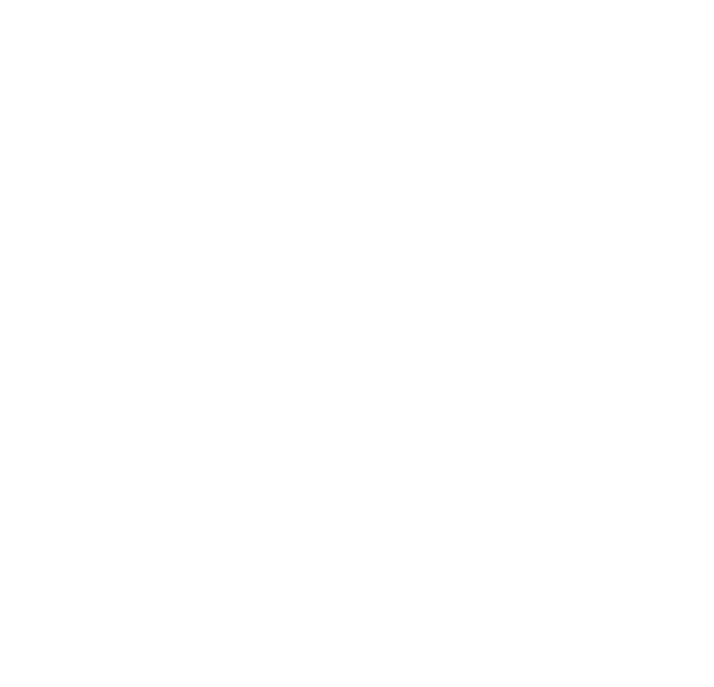

/home/zt/Documents/Image Classification Data/Shop_outdoor/43312084.jpg


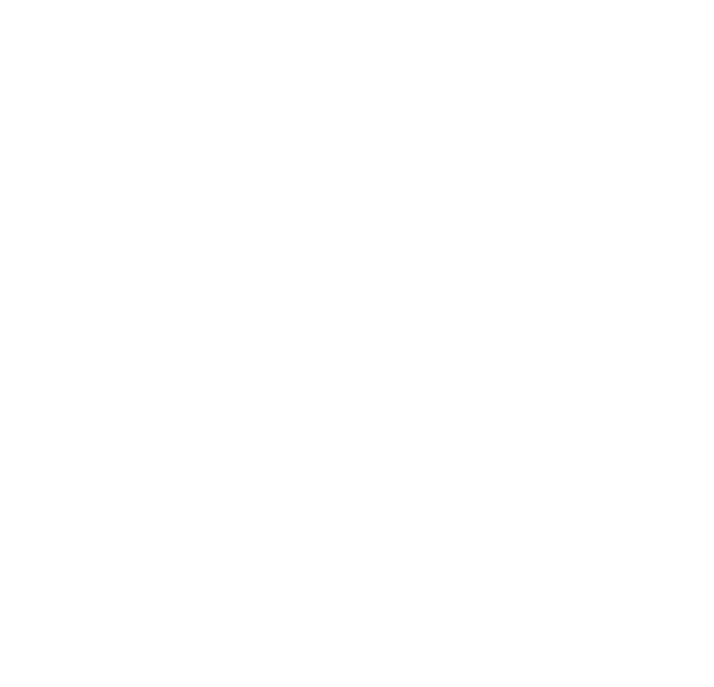

/home/zt/Documents/Image Classification Data/Shop_outdoor/43314951.jpg


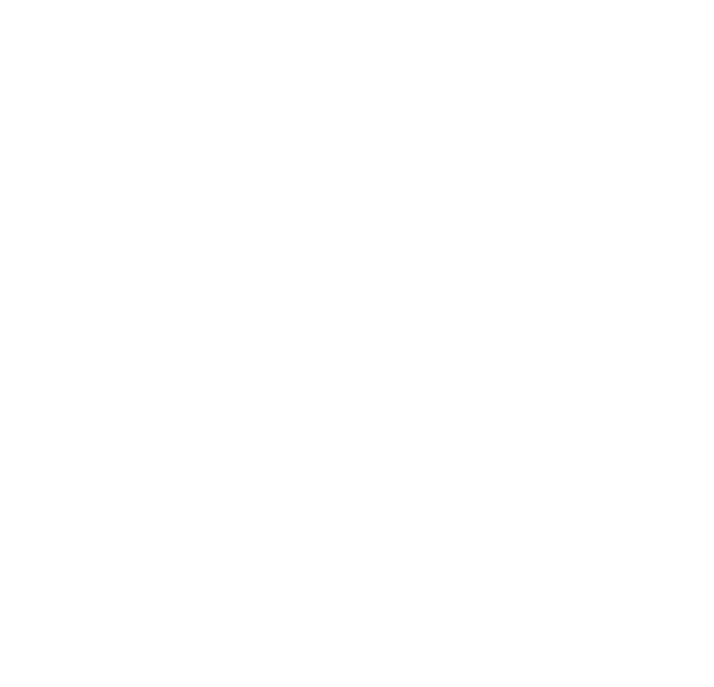

/home/zt/Documents/Image Classification Data/Shop_outdoor/43333192.jpg


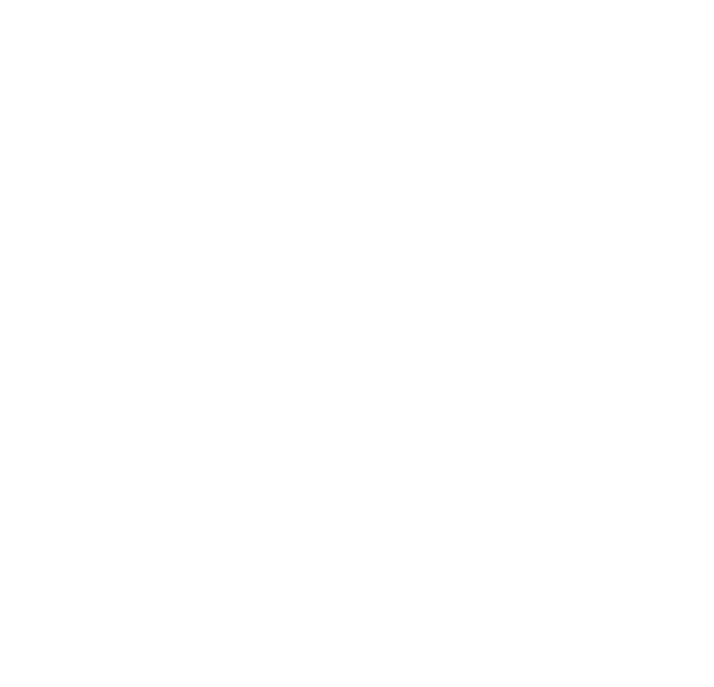

/home/zt/Documents/Image Classification Data/Shop_outdoor/43333195.jpg


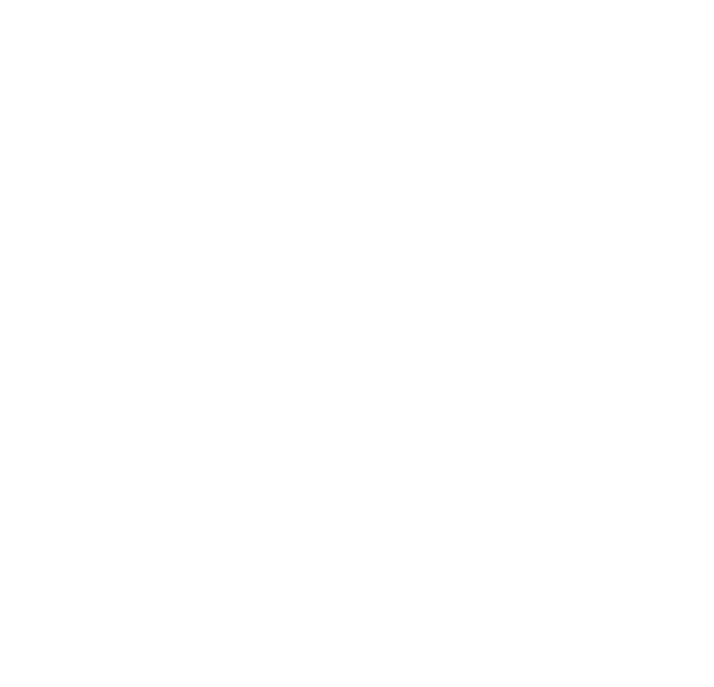

/home/zt/Documents/Image Classification Data/Shop_outdoor/43338741.jpg


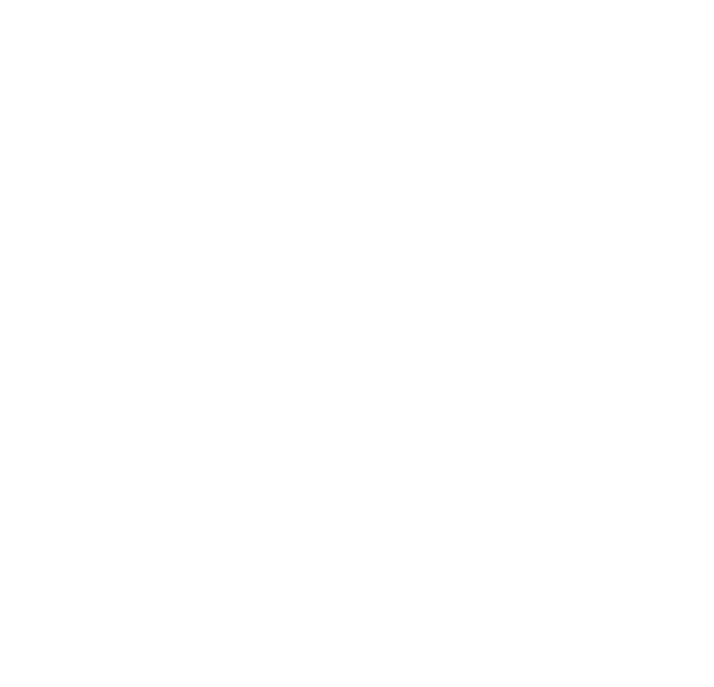

/home/zt/Documents/Image Classification Data/Shop_outdoor/43348478.jpg


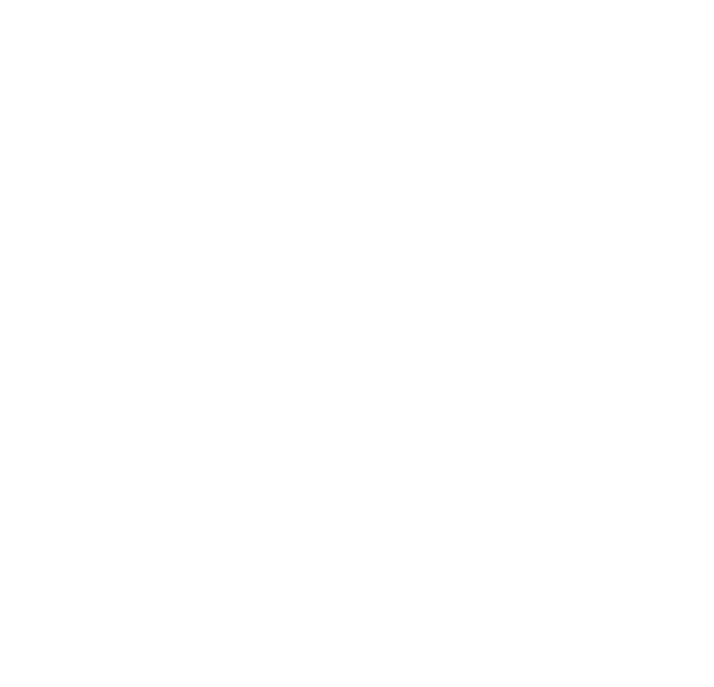

/home/zt/Documents/Image Classification Data/Shop_outdoor/43351464.jpg


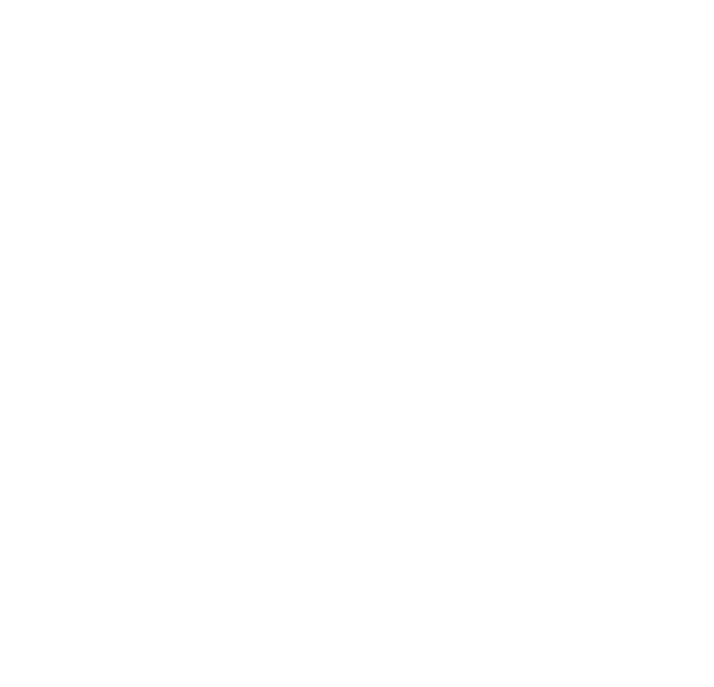

/home/zt/Documents/Image Classification Data/Shop_outdoor/43357268.jpg


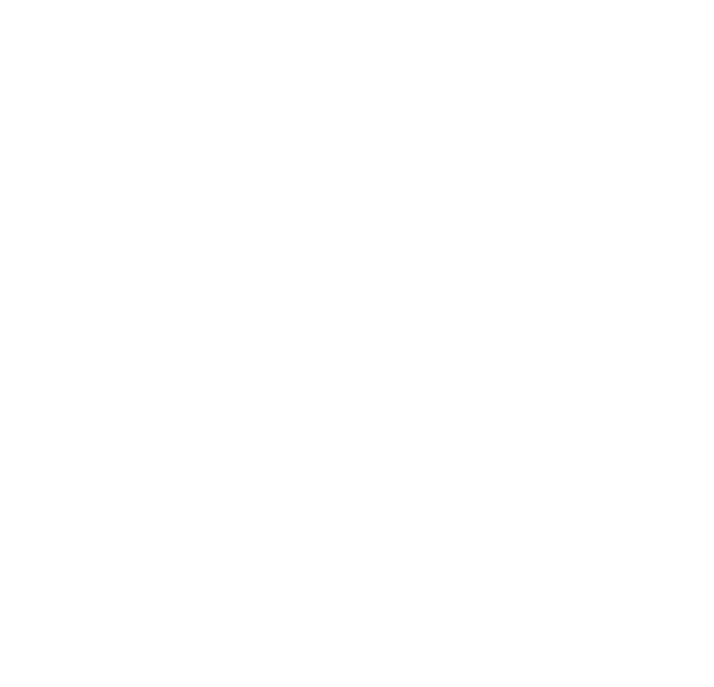

/home/zt/Documents/Image Classification Data/Shop_outdoor/43357921.jpg


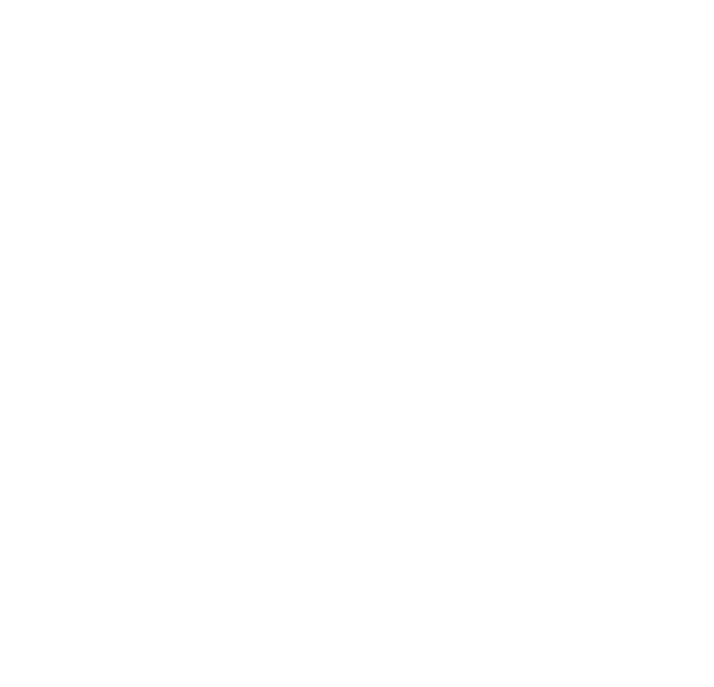

/home/zt/Documents/Image Classification Data/Shop_outdoor/43360946.jpg


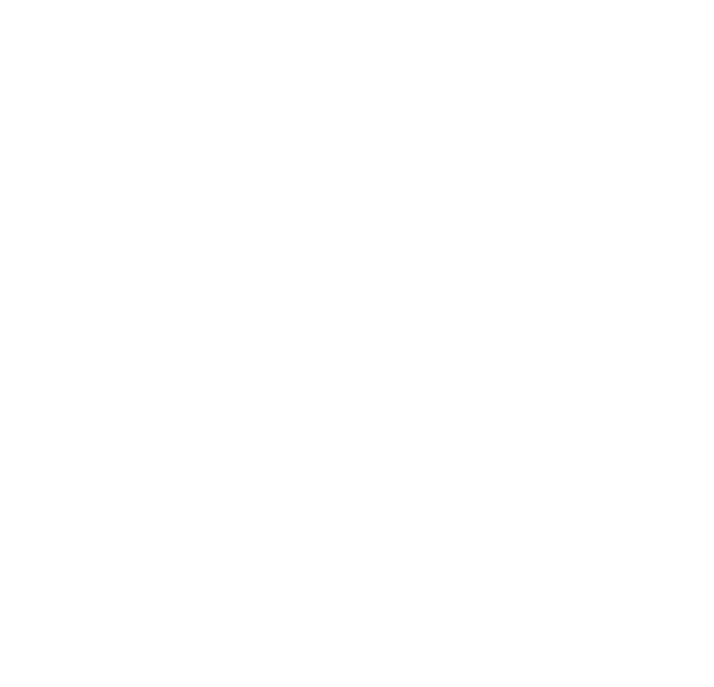

/home/zt/Documents/Image Classification Data/Shop_outdoor/43364962.jpg


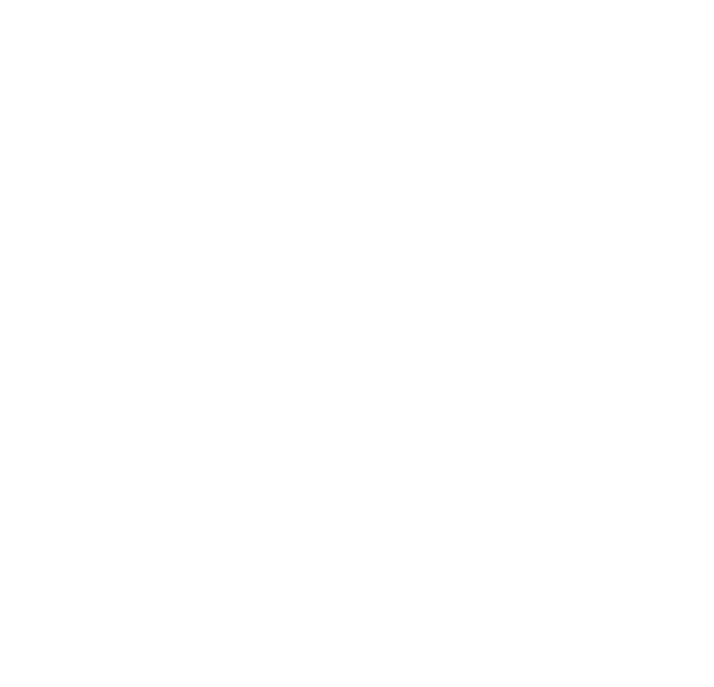

/home/zt/Documents/Image Classification Data/Shop_outdoor/43368175.jpg


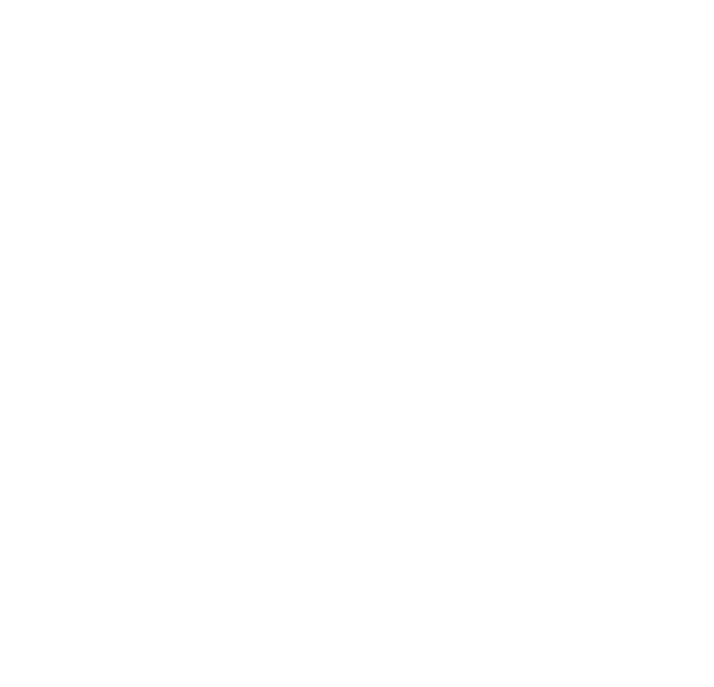

/home/zt/Documents/Image Classification Data/Shop_outdoor/43368184.jpg


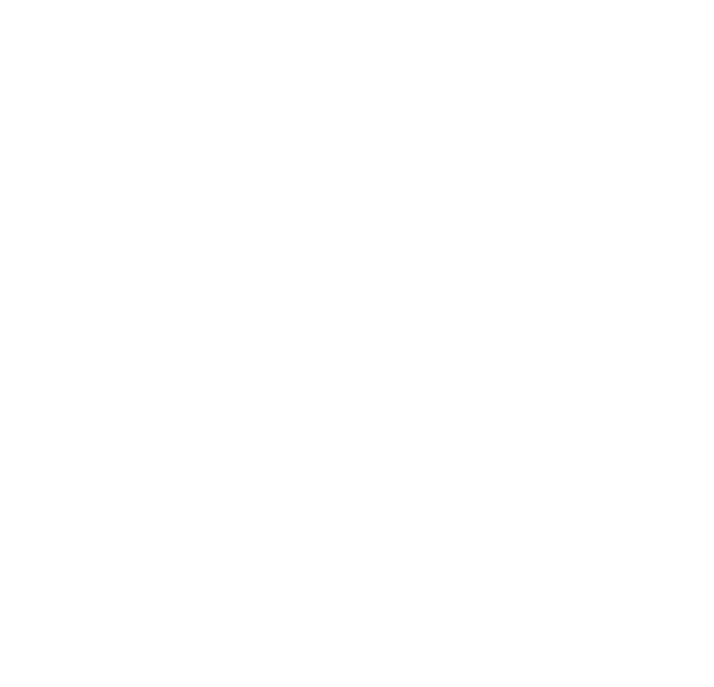

In [106]:
count =0
for image in X_img_paths:
    print(image)
    image2 = mpimg.imread(image)
    
    gs1 = gridspec.GridSpec(10, 10)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
    plt.figure(figsize=(12,12))
    
    for i in range(50):
        
        #print(image2)
        img = transform_image(image2,20,10,5)
        #print (img)
        cv2.imwrite('/home/zt/Documents/Image Classification Data/AUGMENTED/Shop_outdoor/'+str(count)+'.jpg', img)
        #plt.savefig('/home/zt/Documents/Image Classification Data/Customer Area/image'+str(i)+'.jpg')
        #plt.subplot(10,10,i+1)
        #plt.imshow(img)
        count+=1
        plt.axis('off')

    plt.show()

